In [1]:
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from matplotlib.pyplot import figure

pd.set_option('display.max_rows', 100)

In [3]:
PATH = './datasets/data_immobilier.csv'

In [4]:
dataset = pd.read_csv(PATH)

In [5]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
dataset.sample(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1232,1233,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,101800
923,924,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,193000
1429,1430,20,RL,NaN,12546,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,182900
991,992,70,RM,121.0,17671,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,168000
1117,1118,20,RL,57.0,9764,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130000
530,531,80,RL,85.0,10200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Abnorml,175000
470,471,120,RL,NaN,6820,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,212000
636,637,30,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,ConLw,Normal,60000
427,428,20,RL,77.0,8593,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,109008
346,347,20,RL,NaN,12772,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,15500,4,2007,WD,Normal,151500


In [7]:
dataset.shape

(1460, 81)

In [8]:
dataset.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [9]:
dataset.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

## Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df = dataset.copy()

In [12]:
LE = LabelEncoder()

In [13]:
skewness = {}
for col in df.columns: 
    if df[col].dtypes == 'O': 
        df[col] = df[col].astype('category')
        df[col] = LE.fit_transform(df[col])
    else: 
        skewness[col] = df.skew(numeric_only=None)[col]
    df = df.dropna(subset=[col])

<ipython-input-13-9e67f6732a51>:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness[col] = df.skew(numeric_only=None)[col]


In [14]:
cols_to_normalize = []
for col in skewness: 
    if skewness[col] >= -0.5 and skewness[col] <= 0.5: 
        pass
    else: 
        cols_to_normalize.append(col)

In [15]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,3,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,3,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,3,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,3,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,3,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,2,0,3,0,...,0,3,2,1,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,2,3,3,0,...,0,3,4,3,0,8,2007,8,4,307000
8,9,50,4,51.0,6120,1,2,3,3,0,...,0,3,4,3,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,2,3,3,0,...,0,3,4,3,0,1,2008,8,4,118000
10,11,20,3,70.0,11200,1,2,3,3,0,...,0,3,4,3,0,2,2008,8,4,129500


In [16]:
# log of the features non-normally dstributed => avoids too mush sensitivity to outliers
for col in cols_to_normalize: 
    df[col] = df[col].apply(lambda x : np.log(x) if x > 0 else 0)

In [17]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,4.094345,3,4.174387,9.041922,1,2,3,3,0,...,0.0,3,4,3,0.000000,2,2008,8,4,12.247694
1,2,2.995732,3,4.382027,9.169518,1,2,3,3,0,...,0.0,3,4,3,0.000000,5,2007,8,4,12.109011
2,3,4.094345,3,4.219508,9.328123,1,2,0,3,0,...,0.0,3,4,3,0.000000,9,2008,8,4,12.317167
3,4,4.248495,3,4.094345,9.164296,1,2,0,3,0,...,0.0,3,4,3,0.000000,2,2006,8,0,11.849398
4,5,4.094345,3,4.430817,9.565214,1,2,0,3,0,...,0.0,3,4,3,0.000000,12,2008,8,4,12.429216
5,6,3.912023,3,4.442651,9.554993,1,2,0,3,0,...,0.0,3,2,1,6.551080,10,2009,8,4,11.870600
6,7,2.995732,3,4.317488,9.218705,1,2,3,3,0,...,0.0,3,4,3,0.000000,8,2007,8,4,12.634603
8,9,3.912023,4,3.931826,8.719317,1,2,3,3,0,...,0.0,3,4,3,0.000000,4,2008,8,0,11.774520
9,10,5.247024,3,3.912023,8.911934,1,2,3,3,0,...,0.0,3,4,3,0.000000,1,2008,8,4,11.678440
10,11,2.995732,3,4.248495,9.323669,1,2,3,3,0,...,0.0,3,4,3,0.000000,2,2008,8,4,11.771436


## Utils

In [18]:
def feature_importance(model, model_coef, X_train, y_train): 
    importance_info = list(zip(X_train.columns, model_coef))
    importance = pd.DataFrame(importance_info, columns=["feature", "importance"])
    results = permutation_importance(model, X_train, y_train, scoring='neg_mean_squared_error').importances_mean
    importance["by_permutation"] = results
    return importance

## Models 

In [19]:
from sklearn.inspection import permutation_importance

In [20]:
# train_test_split
X_train = df.sample(frac = 0.8, random_state = 25)
y_train = X_train["SalePrice"]
X_train = X_train.drop(["SalePrice"], axis=1)


X_test = df.drop(X_train.index)
y_test = X_test["SalePrice"]
X_test = X_test.drop(["SalePrice"], axis=1)

In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((897, 80), (897,), (224, 80), (224,))

### Linear regression

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print(f"Train accuracy : {lr.score(X_train,y_train)}")
print(f"Test accuracy : {lr.score(X_test,y_test)}")

Train accuracy : 0.9195007495393277
Test accuracy : 0.8077954722634981


In [24]:
lr_importance = feature_importance(lr, lr.coef_, X_train, y_train)

<BarContainer object of 80 artists>

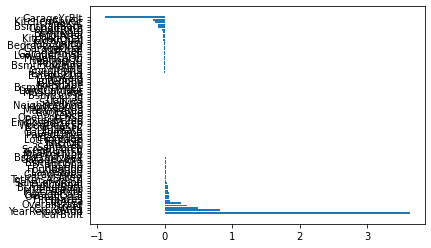

In [25]:
lr_importance = lr_importance.sort_values('importance', ascending=False)
pyplot.barh(lr_importance.feature, lr_importance.importance)

<BarContainer object of 80 artists>

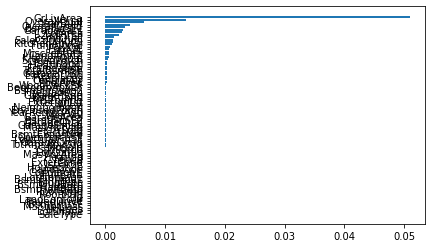

In [26]:
lr_importance = lr_importance.sort_values('by_permutation', ascending=True)
pyplot.barh(lr_importance.feature, lr_importance.by_permutation)

### Random Forests

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print(f"Train accuracy : {rf.score(X_train,y_train)}")
print(f"Test accuracy : {rf.score(X_test,y_test)}")

Train accuracy : 0.9821571747710469
Test accuracy : 0.8414526584839284


In [29]:
rf_importance = feature_importance(rf, rf.feature_importances_, X_train, y_train)

<BarContainer object of 80 artists>

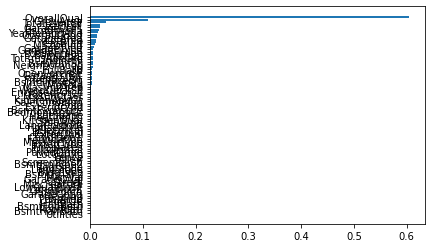

In [30]:
rf_importance = rf_importance.sort_values('importance', ascending=True)
pyplot.barh(rf_importance.feature, rf_importance.importance)

<BarContainer object of 80 artists>

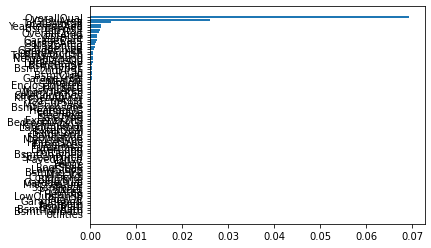

In [31]:
rf_importance = rf_importance.sort_values('by_permutation', ascending=True)
pyplot.barh(rf_importance.feature, rf_importance.by_permutation)

### Random Forests with Cross-Validation and RandomSearch

In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [33]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [34]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid,
    n_iter = 100, 
    scoring='neg_mean_absolute_error', 
    cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)


In [35]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [36]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

### RandomForest with GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param_grid = {
    'bootstrap': [False],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [4],
    'n_estimators': [550, 600, 650]
}

rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, return_train_score=True)

In [39]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [False],
                         'max_depth': [5, 10, 15, 20, 25, 30],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1], 'min_samples_split': [4],
                         'n_estimators': [550, 600, 650]},
             return_train_score=True, verbose=2)

In [40]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 600}

In [41]:
rf_grid = RandomForestRegressor(bootstrap = False, max_depth = 25, max_features = 'sqrt',
    min_samples_leaf = 1, min_samples_split = 4, n_estimators = 600)

rf_grid.fit(X_train, y_train)
print(f"Train accuracy : {rf_grid.score(X_train,y_train)}")
print(f"Test accuracy : {rf_grid.score(X_test,y_test)}")

Train accuracy : 0.9982224492460129
Test accuracy : 0.8503192045814609


In [42]:
rf_grid_importance = feature_importance(rf_grid, rf_grid.feature_importances_, X_train, y_train)

<BarContainer object of 80 artists>

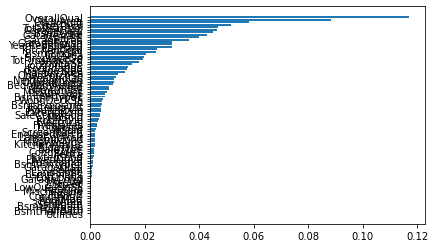

In [43]:
rf_grid_importance = rf_grid_importance.sort_values('importance', ascending=True)
pyplot.barh(rf_grid_importance.feature, rf_grid_importance.importance)

<BarContainer object of 80 artists>

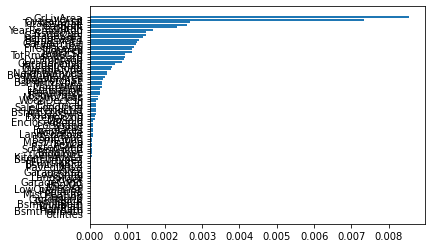

In [44]:
rf_grid_importance = rf_grid_importance.sort_values('by_permutation', ascending=True)
pyplot.barh(rf_grid_importance.feature, rf_grid_importance.by_permutation)

### XGBoost

In [45]:
from xgboost import XGBRegressor

In [46]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print(f"Train accuracy : {xgb.score(X_train,y_train)}")
print(f"Test accuracy : {xgb.score(X_test,y_test)}")

Train accuracy : 0.9998649521022465
Test accuracy : 0.8473847331683265


In [47]:
xgb_importance = feature_importance(xgb, xgb.feature_importances_, X_train, y_train)

<BarContainer object of 80 artists>

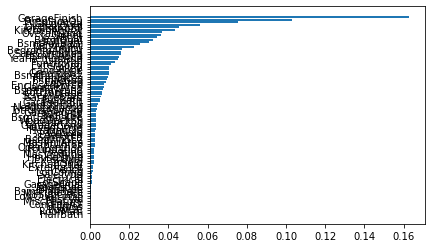

In [48]:
xgb_importance = xgb_importance.sort_values('importance', ascending=True)
pyplot.barh(xgb_importance.feature, xgb_importance.importance)

<BarContainer object of 80 artists>

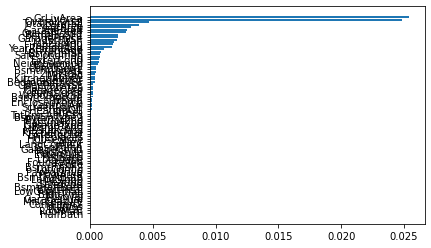

In [49]:
xgb_importance = xgb_importance.sort_values('by_permutation', ascending=True)
pyplot.barh(xgb_importance.feature, xgb_importance.by_permutation)